Name: 신백록

ID: 2019150445

Write your codes and descriptions in the below **implementation** section. \
This file should be successfully implemented when running all cells.

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import random

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

## Dataset

In [2]:
from sklearn.datasets import fetch_openml

def make_datasets(studnet_id, n_samples, n_labeled):
  random.seed(student_id)
  labeled_idx = random.sample(range(n_samples), n_labeled)

  mnist = fetch_openml('mnist_784', version=1, as_frame=False)
  mnist.target = mnist.target.astype(np.uint8)
  X = mnist['data'][:n_samples]
  y = mnist['target'][:n_samples]

  X_labeled = []
  y_labeled = []
  X_unlabeled = []

  for idx in range(n_samples):
    if idx in labeled_idx:
      X_labeled.append(X[idx])
      y_labeled.append(y[idx])
    else:
      X_unlabeled.append(X[idx])

  return np.array(X_labeled), np.array(y_labeled), np.array(X_unlabeled)

In [3]:
from sklearn.model_selection import train_test_split

student_id = 2019150445
n_samples = 10000
n_labeled = 1000

# Make labeled and unlabeled datasets
X_labeled, y_labeled, X_unlabeled = make_datasets(student_id, n_samples, n_labeled)

# Split the labeled dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

## Implementation
- Set the random state parameters of all possible functions to your student ID.
- Train a random forest classifier that shows more than 80% accuracy using the labeled dataset.
- Train a K-means algorithm that identifies 100 clusters. & Show the representative images closest to the centroid of each cluster.
- Make the pseudo-label on the representative images using the trained classifier.
- Retrain a random forest classifier using the labeled and pseudo-labeled datasets together.

### Train a random forest classifier that shows more than 80% accuracy using the labeled dataset.

In [4]:
rf = RandomForestClassifier(random_state=student_id, n_estimators=100, max_features='auto')
rf.fit(X_train,y_train)
pred_labeled = rf.predict(X_test)
pred_train_labeled = rf.predict(X_train)
print('train acc:',accuracy_score(pred_train_labeled, y_train))
print('test acc:',accuracy_score(pred_labeled, y_test))

train acc: 1.0
test acc: 0.9


RandomForestClassifier는 실행할 때마다 다른 결과가 나오기 때문에 random_state를 고정시켜두었고, GridSearchCV 라이브러리를 사용할 수 없기에 생성할 트리의 개수를 결정하는 n_estimators와 최대 특성변수의 개수를 결정하는 max_features를 몇 개 시도해보았다. n_estimator=100, max_features='auto'일 때가 성능이 그 중 가장 괜찮았다.

그 후 RandomForestClassfier을 train set에 적합시킨 후, train set과 test set에 predict 시키고 accuracy를 확인해 보았다.
train acc는 1.0, test acc는 0.9가 나왔다. Decision tree의 특성 상 train set에 오버피팅 되었다는 것을 알 수 있다.

In [5]:
rf = RandomForestClassifier(random_state=student_id, n_estimators=100, min_samples_split=22, max_depth=9)
rf.fit(X_train,y_train)
pred_labeled = rf.predict(X_test)
pred_train_labeled = rf.predict(X_train)
print('train acc:',accuracy_score(pred_train_labeled, y_train))
print('test acc:',accuracy_score(pred_labeled, y_test))

train acc: 0.975
test acc: 0.9


overfitting을 해결하기 위해 특정 노드의 sample이 설정해 둔 값보다 작아지면 더이상 tree를 분할하지 않는 min_samples_split과 트리의 최대 깊이를 결정하는 max_depth를 몇몇 시도해보았다. test accuarcy는 똑같은 반면 train acc는 약간 내려가 오버피팅이 조금 해결되긴 하였지만 아직 train set에 많이 오버피팅 되어있다.

결론적으로 labeled된 train set이 800개 밖에 안 되기에 좋은 성능을 내진 못하였다.

### Train a K-means algorithm that identifies 100 clusters. & Show the representative images closest to the centroid of each cluster.

In [6]:
k = 100
kmeans = KMeans(n_clusters=k, random_state=student_id) 
#100 cluster를 군집화하는 kmeans model을 정의하였다.

X_digits_dist = kmeans.fit_transform(X_train) 
#각 digit에서 100개의 cluster 중심까지의 거리를 계산하여 X_digits_dist에 저장하였다.

representative_idx = np.argmin(X_digits_dist, axis=0) 
#100개의 cluster의 중심에서 가장 가까이 있는 digit의 index를 추출하였다.

X_representative = X_train[representative_idx] 
#위에서 나온 100개의 cluster 중심에서 가장 가까이 있는 digit들을 각 클러스터의 representative image로 정의하였다.

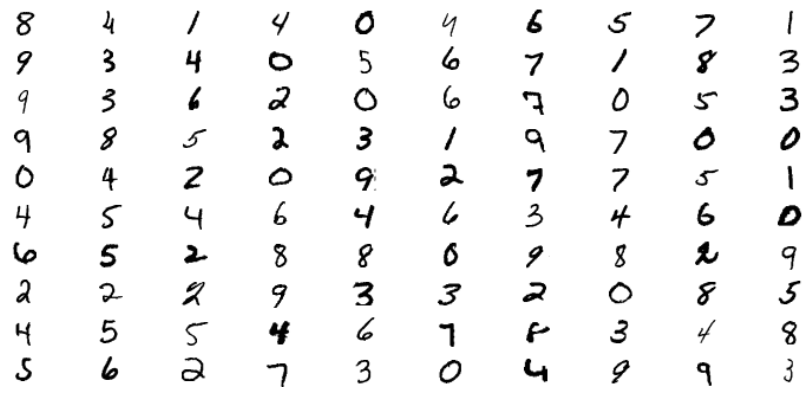

In [7]:
plt.figure(figsize=(15, 7))
for index, image in enumerate(X_representative):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(image.reshape(28, 28), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [8]:
y_representative_digits = np.array([8,4,1,4,0,5,6,5,7,1,
                                    9,3,4,0,5,6,7,1,8,3,
                                    9,3,6,2,0,6,7,0,5,3,
                                    9,8,5,2,3,1,9,7,0,0,
                                    0,4,2,0,9,2,7,7,5,1,
                                    4,5,4,6,4,6,3,4,6,0,
                                    6,5,2,8,8,0,9,8,2,9,
                                    2,2,2,9,3,3,2,0,8,5,
                                    4,5,5,4,6,7,8,3,4,8,
                                    5,6,2,7,3,0,4,9,9,3])
#representative image를 보고 직접 labeling을 하였다.

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
#X_train의 모든 instance에 y값(label)을 cluster에 따라 부여하였다. 
#즉 위에서 labeling한 image를 그 클러스터의 y값으로 간주하고, 그 클러스터에 속한 모든 데이터의 y를 위에서 정한 y값으로 하였다.

In [9]:
rf_representative=RandomForestClassifier(random_state=student_id, n_estimators=100)
rf_representative.fit(X_train, y_train_propagated)
rf_representative.score(X_test, y_test)

0.85

그 다음 X_train과 위에서 cluster에 따라 추정한 y_train_propagated로 RandomForest모델을 적합시켰고, test data에 적합시켰더니 0.85의 accuracy가 나왔다.

In [10]:
for percentile_closest in range(0, 100, 5):
#for문을 이용하여 percentile을 0부터 100까지 5단위로 키워가며 Centroid와의 거리의 percentile 안에 들어오는 data들을만 train에 이용하였다.
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
    #800개 instance들 각각에 대하여 가장 가까이 있는 centroid와의 거리를 계산하였다.
    
    for i in range(k):
        in_cluster = (kmeans.labels_==i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
        #X_cluster_dist에서 percentile에 따른 cutoff_distance를 넘는 instance에 대해서는 -1의 값을 부여하였다.
    
    partially_propagated = (X_cluster_dist != -1)
    #-1의 값을 가지는 instance는 False, 나머지는 True로 표현되게 하였다.
    
    X_train_partially_propagated = X_train[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    #True값을 가지는 train instance들(cutoff_distance 안에 들어오는 instance)만 train에 사용하였다.
    
    rf_partial=RandomForestClassifier(random_state=student_id, n_estimators=100)
    rf_partial.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('%d percentile_closest acc: %s'%(percentile_closest,rf_partial.score(X_test, y_test)))
    #RandomForestClassifer를 정의하고, 위에서 나온 데이터들로 모델을 적합하여 test set에 대한 score를 출력하였다.

0 percentile_closest acc: 0.77
5 percentile_closest acc: 0.76
10 percentile_closest acc: 0.8
15 percentile_closest acc: 0.85
20 percentile_closest acc: 0.8
25 percentile_closest acc: 0.825
30 percentile_closest acc: 0.84
35 percentile_closest acc: 0.83
40 percentile_closest acc: 0.815
45 percentile_closest acc: 0.8
50 percentile_closest acc: 0.845
55 percentile_closest acc: 0.825
60 percentile_closest acc: 0.835
65 percentile_closest acc: 0.825
70 percentile_closest acc: 0.82
75 percentile_closest acc: 0.845
80 percentile_closest acc: 0.84
85 percentile_closest acc: 0.845
90 percentile_closest acc: 0.83
95 percentile_closest acc: 0.845


단순히 representative digit들로 X_train의 y값을 결정해 RandomForest를 적합한 모델(rf_representative)의 accuracy가 0.85로 Centroid에 가까운 몇개의 데이터만 이용하는 모델보다 좋은 성능이 나왔다. 

따라서 rf_partial이 아닌, 위에 적합했던 rf_representative모델을 그대로 이용할 것이다.

### Make the pseudo-label on the representative images using the trained classifier.

In [11]:
y_pseudo = rf_representative.predict(X_unlabeled)
print(y_pseudo)

[5 4 1 ... 6 9 7]


Unlabel된 data를 위에서 적합한 rf_representative 모델로 label(y)을 predict해 y_pseudo에 저장하였다.

### Retrain a random forest classifier using the labeled and pseudo-labeled datasets together.

In [12]:
X_concat=np.concatenate((X_train, X_unlabeled))
y_concat=np.concatenate((y_train, y_pseudo))

rf_retrain=RandomForestClassifier(random_state=student_id, n_estimators=100, max_depth=13, min_samples_split=22)
rf_retrain.fit(X_concat, y_concat)

pred_concat=rf_retrain.predict(X_test)
print(accuracy_score(pred_concat, y_test))

0.88


Semi-supervised Learning의 결과로 0.88정도의 accuracy를 가지는 모델을 만들었다. 위에서 label을 가지고 있는 데이터들로 적합한 모델의 결과보다는 좋지 않은 결과가 나왔지만, 9000개의 Unlabel된 데이터를 800개의 label된 데이터로 꽤나 제대로 분리하였다.